<a href="https://colab.research.google.com/github/TatianePadilhaS/TatianePS/blob/main/avaliacao3_fce_matheus_tatiane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nomes: Matheus Bezerra Alves- 2021100043

Tatiane Padilha da Silva- 2021100332

# Identificação do Problema

O trabalho tem como objetivo estudar a cinética de uma reação química genérica, do tipo A → Produtos . O foco é analisar como a concentração do reagente [A] varia ao longo do tempo, observando seu comportamento de decaimento.

A principal preocupação do estudo não são apenas os valores de concentração, mas sim os parâmetros que descrevem matematicamente a reação. Esses parâmetros incluem a ordem da reação e a constante de velocidade k, que permitem compreender quantitativamente a rapidez com que o reagente é consumido.

Espera-se que a concentração do reagente diminua de forma contínua ao longo do tempo. O objetivo é identificar qual modelo matemático de ordem zero, um ou dois se ajusta melhor a essa diminuição. Por meio da análise dos dados experimentais e da aplicação de regressão linear sobre as transformações adequadas das concentrações, é possível determinar a ordem da reação mais provável e calcular a constante de velocidade correspondente.

Dessa forma, o estudo fornece uma interpretação clara do comportamento do sistema químico, permitindo compreender de maneira quantitativa como a reação ocorre e qual modelo descreve melhor seu comportamento.

# Formulação do Modelo

O modelo matemático utilizado neste trabalho baseia-se nas leis de velocidade para reações de ordem zero, um e dois. A estratégia adotada consiste em transformar essas leis em equações lineares da forma y = mx + b, permitindo a aplicação de regressão linear para determinar os parâmetros da reação.

Para uma reação de ordem zero, a equação é:

$$[A]_t = -k \cdot t + [A]_0$$


Nesse caso, o gráfico de [A] versus tempo resulta em uma reta.
Para uma reação de primeira ordem, a equação é:

$$\ln[A]_t = -k \cdot t + \ln[A]_0$$


O gráfico ln([A]) versus tempo também apresenta uma reta.

Para uma reação de segunda ordem, a equação é:

$$\frac{1}{[A]_t} = k \cdot t + \frac{1}{[A]_0}$$

O gráfico 1/[A] versus tempo é igualmente linear.

Algumas simplificações foram adotadas para tornar o modelo mais aplicável. Considera-se que a reação pode ser descrita por uma das três ordens elementares analisadas. A temperatura do sistema é mantida constante, garantindo que a constante de velocidade k não varie. Não são consideradas reações reversas ou processos paralelos que interfiram na cinética, e o volume do reator é constante.

Os parâmetros a serem determinados pelo modelo são a ordem da reação e a constante de velocidade k, que corresponde à inclinação da reta obtida pelo ajuste. A concentração inicial [A]0 é determinada pelo intercepto da reta de melhor ajuste do modelo que melhor descreve os dados experimentais.

# Coleta e Tratamento de Dados

Os dados experimentais foram coletados a partir de um exercício de cinética química presente na videoaula disponível no YouTube. A tabela com os valores de tempo e concentração do reagente foi extraída diretamente do vídeo. Os dados consistem em pares de valores que representam a concentração de um reagente em diferentes intervalos de tempo durante uma reação.

O link do vídeo pode ser acessado em: https://www.youtube.com/watch?v=R9hjGj_cagQ.

# Implementação Computacional

Melhor ajuste: Ordem 2
R² = 0.9999
Constante de velocidade (k) = 0.0594


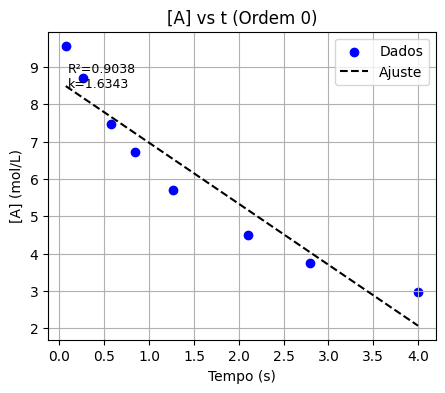

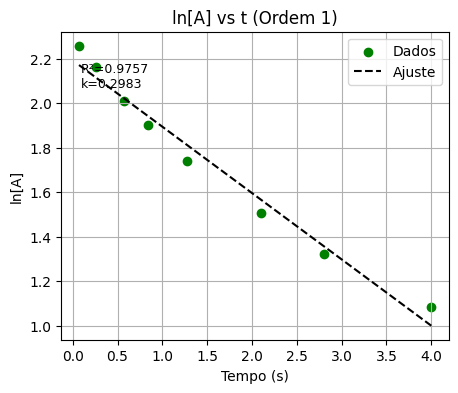

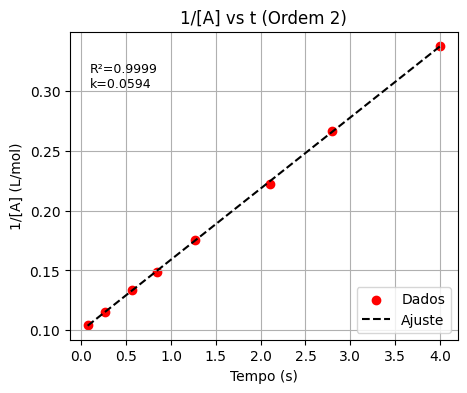

In [ ]:
# Importa bibliotecas necessárias
import numpy as np                 # NumPy para cálculos numéricos e manipulação de arrays
import pandas as pd                # Pandas (não usado aqui, mas geralmente para manipulação de tabelas)
from scipy.stats import linregress  # Função para regressão linear (reta de melhor ajuste)
import matplotlib.pyplot as plt     # Matplotlib para plotar gráficos

# =========================
# Dados de exemplo
# Tempo (min) e concentração (mol/L)
# =========================
tempo = np.array([0.07, 0.26, 0.57, 0.84, 1.27, 2.1,2.8,4], dtype=float)               # Vetor com tempos em minutos
concentracao = np.array([9.57, 8.7, 7.47, 6.71, 5.7, 4.5,3.75,2.96],   # Vetor com concentrações correspondentes
                         dtype=float)

def calcular_r2_e_k(tempo, concentracao):
    resultados = {}  # Dicionário para guardar os resultados de cada ordem

    # Ordem 0: gráfico de [A] vs tempo
    slope0, intercept0, r0, _, _ = linregress(tempo, concentracao)
    resultados['0'] = (r0**2, slope0, intercept0, concentracao, tempo)

    # Ordem 1: gráfico de ln[A] vs tempo
    slope1, intercept1, r1, _, _ = linregress(tempo, np.log(concentracao))
    resultados['1'] = (r1**2, slope1, intercept1, np.log(concentracao), tempo)

    # Ordem 2: gráfico de 1/[A] vs tempo
    slope2, intercept2, r2, _, _ = linregress(tempo, 1 / concentracao)
    resultados['2'] = (r2**2, slope2, intercept2, 1/concentracao, tempo)

    return resultados  # Retorna o dicionário com todas as ordens

# Calcula os ajustes para cada ordem
resultados = calcular_r2_e_k(tempo, concentracao)

# Descobre qual ordem tem o maior R² (melhor ajuste)
ordem_melhor = max(resultados, key=lambda ordem: resultados[ordem][0])

# Extrai os valores da melhor ordem
r2_melhor, slope_melhor, intercept_melhor, _, _ = resultados[ordem_melhor]

# Mostra no terminal a ordem e a constante de velocidade
print(f"Melhor ajuste: Ordem {ordem_melhor}")
print(f"R² = {r2_melhor:.4f}")
print(f"Constante de velocidade (k) = {abs(slope_melhor):.4f}")

# PLOT DOS GRÁFICOS

titulos = {  # Dicionário com títulos dos gráficos para cada ordem da reação
    '0': '[A] vs t (Ordem 0)',       # Título para gráfico ordem zero
    '1': 'ln[A] vs t (Ordem 1)',     # Título para gráfico ordem um
    '2': '1/[A] vs t (Ordem 2)'      # Título para gráfico ordem dois
}

cores = {'0': 'blue', '1': 'green', '2': 'red'}  # Cores para os pontos dos dados em cada gráfico

labels_y = {'0': '[A] (mol/L)', '1': 'ln[A]', '2': '1/[A] (L/mol)'}  # Rótulos do eixo y para cada gráfico

for ordem in ['0', '1', '2']:  # Loop para gerar um gráfico para cada ordem da reação
    r2, slope, intercept, y_data, t_data = resultados[ordem]  # Extrai resultados da regressão para a ordem atual
    y_fit = slope * t_data + intercept  # Calcula valores ajustados da reta (linha do ajuste)

    plt.figure(figsize=(5, 4))  # Cria nova figura com tamanho definido
    plt.scatter(t_data, y_data, color=cores[ordem], label='Dados')  # Plota pontos dos dados experimentais
    plt.plot(t_data, y_fit, color='black', linestyle='--', label='Ajuste')  # Plota linha da regressão (reta do ajuste)

    plt.title(titulos[ordem])  # Define título do gráfico conforme a ordem
    plt.xlabel('Tempo (s)')  # Define rótulo do eixo x como tempo em segundos
    plt.ylabel(labels_y[ordem])  # Define rótulo do eixo y conforme o tipo de gráfico
    plt.legend()  # Exibe legenda para identificar pontos e linha de ajuste
    plt.grid(True)  # Adiciona grade no gráfico para melhor visualização
    plt.text(0.05, 0.9,  # Insere texto com valores de R² e constante k
             f'R²={r2:.4f}\nk={abs(slope):.4f}',
             transform=plt.gca().transAxes,  # Usa coordenadas relativas ao gráfico
             fontsize=9,
             verticalalignment='top')
    plt.show()  # Exibe o gráfico


# Validação e verificação

O código realizou uma regressão linear para três modelos cinéticos diferentes (ordem 0, 1 e 2) e calculou o coeficiente de determinação (R^2) para cada um, que indica a qualidade do ajuste da linha de tendência aos dados experimentais.

Aqui estão os valores obtidos:

Ordem 0: R
2
 =0.9038

Ordem 1: R
2
 =0.9757

Ordem 2: R
2
 =0.9999

A ordem de reação com o maior R^2
  é a que melhor se ajusta aos dados. Nesse caso, a reação de segunda ordem apresenta um R^2
  de 0.9999, o que é um ajuste quase perfeito.

O valor de R^2
  de 0.9999 para a reação de segunda ordem é estatisticamente muito forte. Ele indica que 99.99% da variação nos dados de 1/[A] pode ser explicada pela variação no tempo. Isso nos dá uma alta confiança de que o modelo de segunda ordem é o mais adequado para descrever a cinética da reação.

A constante de velocidade (k) calculada para a segunda ordem é de 0.0594. O valor positivo de k está de acordo com a equação integrada para uma reação de segunda ordem onde a inclinação da reta de 1/[A] versus tempo é positiva, como na equação abaixo: $$\ln[A]_t = -k \cdot t + \ln[A]_0$$


# Conclusão

Com base na análise dos dados experimentais e na aplicação das leis de velocidade integradas para ordens zero, primeira e segunda, permitiu concluir que a reação estudada segue uma cinética de segunda, com coeficiente de determinação R^2 = 0,9999 e constante de velocidade k = 0,0594 L mol-1s-1. A concordância total entre os resultados obtidos pelo modelo computacional em Python e os valores apresentados na fnte dos dados confirma a precisão da metodologia.

Logo, estudo demonstrou a eficácia do uso de ferramentas computacionais na análise cinética, evidenciando que a abordagem aplicada é rápida, confiável e reprodutível, podendo ser utilizada em diferentes sistemas reacionais para a caracterização precisa do comportamento químico.